<a href="https://colab.research.google.com/github/MobinaSedaghat/Predict-Student-Performance-from-Game-Play/blob/main/Predict_Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download Dataset

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c 'predict-student-performance-from-game-play'

100% 966M/968M [00:28<00:00, 42.2MB/s]
100% 968M/968M [00:28<00:00, 35.1MB/s]


In [ ]:
!mkdir predict-student-performance-from-game-play

In [ ]:
!unzip predict-student-performance-from-game-play -d predict-student-performance-from-game-play

Archive:  predict-student-performance-from-game-play.zip
  inflating: predict-student-performance-from-game-play/jo_wilder/__init__.py  
  inflating: predict-student-performance-from-game-play/jo_wilder/competition.cpython-37m-x86_64-linux-gnu.so  
  inflating: predict-student-performance-from-game-play/jo_wilder_310/__init__.py  
  inflating: predict-student-performance-from-game-play/jo_wilder_310/competition.cpython-310-x86_64-linux-gnu.so  
  inflating: predict-student-performance-from-game-play/sample_submission.csv  
  inflating: predict-student-performance-from-game-play/test.csv  
  inflating: predict-student-performance-from-game-play/train.csv  
  inflating: predict-student-performance-from-game-play/train_labels.csv  


#Load Data

In [ ]:
dtypes={
    'elapsed_time':np.int32,
    'event_name':'category',
    'name':'category',
    'level':np.uint8,
    'room_coor_x':np.float32,
    'room_coor_y':np.float32,
    'screen_coor_x':np.float32,
    'screen_coor_y':np.float32,
    'hover_duration':np.float32,
    'text':'category',
    'fqid':'category',
    'room_fqid':'category',
    'text_fqid':'category',
    'fullscreen':'category',
    'hq':'category',
    'music':'category',
    'level_group':'category'}

In [ ]:
data = pd.read_csv('predict-student-performance-from-game-play/train.csv',dtype=dtypes)

In [ ]:
data.head(10)

,session,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991394,-159.314682,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
5,20090312431273200,5,3423,person_click,basic,0,NaN,-412.991394,-157.314682,381.0,492.0,NaN,"Sure thing, Jo. Grab your notebook and come up...",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
6,20090312431273200,6,5197,person_click,basic,0,NaN,478.485077,-199.971680,593.0,485.0,NaN,"See you later, Teddy.",teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,0,0,1,0-4
7,20090312431273200,7,6180,person_click,basic,0,NaN,503.355133,-168.619919,609.0,453.0,NaN,I get to go to Gramps's meeting!,teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,0,0,1,0-4
8,20090312431273200,8,7014,person_click,basic,0,NaN,510.733429,-157.720642,615.0,442.0,NaN,Now where did I put my notebook?,teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,0,0,1,0-4
9,20090312431273200,9,7946,person_click,basic,0,NaN,512.048035,-153.743637,616.0,438.0,NaN,\u00f0\u0178\u02dc\u00b4,teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,0,0,1,0-4


In [ ]:
labels = pd.read_csv('predict-student-performance-from-game-play/train_labels.csv')

In [ ]:
test_data = pd.read_csv('predict-student-performance-from-game-play/test.csv',dtype=dtypes)

# Pre-Processing

In [ ]:
def assign_group(x):
    if x <= 3:
        return '0-4'
    elif x <= 13:
        return '5-12'
    elif x <= 22:
        return '13-22'

In [ ]:
labels['session'] = labels.session_id.apply(lambda x: int(x.split('_')[0]) )
labels['level'] = labels.session_id.apply(lambda x: int(x.split('_')[-1][1:]) )
labels['level_group'] = labels['level'].apply(assign_group)

In [ ]:
CATEGORICAL = ['event_name', 'name','fqid', 'room_fqid', 'text_fqid']
NUMERICAL = ['page','room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y']

In [ ]:
def feature_engineer(df):
    dfs = []
    for c in CATEGORICAL:
        tmp = df.groupby(['session','level'])[c].agg('nunique')
        tmp.name = tmp.name + '_nunique'
        dfs.append(tmp)
    for c in NUMERICAL:
        tmp = df.groupby(['session','level'])[c].agg('mean')
        dfs.append(tmp)
    for c in NUMERICAL:
        tmp = df.groupby(['session','level'])[c].agg('std')
        tmp.name = tmp.name + '_std'
        dfs.append(tmp)
    dfs.append(df.groupby(['session','level'])['hover_duration'].agg('sum'))
    dfs.append(df.groupby(['session','level'])['elapsed_time'].agg('max') - df.groupby(['session','level'])['elapsed_time'].agg('min') )
    df = pd.concat(dfs,axis=1)
    df = df.fillna(-1)
    df = df.reset_index()
    df = df.set_index('session')
    return df

In [ ]:
data.rename(columns={'session_id': 'session'}, inplace=True)
data1 = feature_engineer(data)
data1['level_group'] = data1['level'].apply(assign_group)

In [ ]:
data1

,level,event_name_nunique,name_nunique,fqid_nunique,room_fqid_nunique,text_fqid_nunique,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,page_std,room_coor_x_std,room_coor_y_std,screen_coor_x_std,screen_coor_y_std,hover_duration,elapsed_time,level_group
session,,,,,,,,,,,,,,,,,,,
20090312431273200,0,6,3,5,1,6,-1.0,-77.966362,-170.396027,414.250000,463.571442,-1.0,469.524328,84.862476,211.047234,87.147142,0.0,25766,0-4
20090312431273200,1,6,3,6,3,3,-1.0,40.961052,-51.532104,479.193542,356.612915,-1.0,358.166662,116.538196,188.452544,89.020102,7899.0,37346,0-4
20090312431273200,2,6,3,8,2,5,-1.0,-32.314056,-20.021652,411.783783,344.459473,-1.0,324.386196,158.503091,178.524529,106.028716,4349.0,34253,0-4
20090312431273200,3,9,3,13,6,5,-1.0,129.078979,-73.856003,535.359985,387.859985,-1.0,389.874453,117.002236,204.998931,106.129303,6601.0,54712,0-4
20090312431273200,4,4,2,5,2,0,-1.0,-314.366455,-33.835960,149.399994,358.200012,-1.0,422.014525,41.143422,181.938451,39.566540,267.0,38621,5-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22100221145014656,18,10,4,20,6,15,5.0,192.271561,-307.453400,462.376953,366.214661,0.0,570.298966,275.622202,224.434621,106.122278,11481.0,363623,13-22
22100221145014656,19,8,4,8,2,4,5.0,23.592731,-348.888702,471.237274,394.237274,0.0,578.013645,311.786995,265.885206,131.205070,818.0,79414,13-22
22100221145014656,20,8,4,13,3,2,6.0,13.970758,50.846027,493.766663,289.100006,0.0,353.842154,174.283247,253.825039,163.963905,13294.0,53137,13-22


Normalizing Data

In [ ]:
from sklearn.preprocessing import StandardScaler

# create a StandardScaler object
scaler = StandardScaler()

# normalize the specified columns in the dataframe
columns_to_normalize = [ 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y', 'hover_duration', 'elapsed_time']
data1[columns_to_normalize] = scaler.fit_transform(data1[columns_to_normalize])

Splitting three levels of data

In [ ]:
def split_levels(df):
  df1 = df[df['level_group'] == '0-4']
  df2 = df[(df['level_group'] == '5-12') | (df['level_group'] == '0-4')]
  df3 = df[(df['level_group'] == '5-12') | (df['level_group'] == '0-4') | (df['level_group'] == '13-22')]
  return df1, df2, df3

counting the number of correct answers in each group

In [ ]:

data1 = pd.merge(data1, labels[['session','level','correct']],  on=['session','level'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to the level_group column
le.fit(data1['level_group'])

# Encode the level_group column
data1['level_group'] = le.transform(data1['level_group'])


# Model

split test and train data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data1.drop('correct' , axis = 1), data1['correct'], test_size=0.2, random_state=42)


Random Forest

In [ ]:
# import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# # Define the parameter distributions to search over
# param_dist = {
#     'n_estimators': np.arange(150, 501, 50),
#     'max_depth': [None] + list(np.arange(5, 25, 5)),
#     'min_samples_split': np.arange(2, 11),
#     'min_samples_leaf': np.arange(1, 11),
#     'max_features': ['auto', 'sqrt', 'log2', None]
# }

# # Create a Random Forest classifier object
# rf = RandomForestClassifier(random_state=42)

# # Perform a randomized search over the parameter distributions using 5-fold cross-validation
# random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=20, cv=5, random_state=42)

# # Fit the randomized search object to the training data
# random_search.fit(X_train, y_train)

# # Print the best parameter settings
# best_params = random_search.best_params_
# print(f"Best parameter settings: {best_params}")

# # Train a new model using the best parameter settings and evaluate on the test set
# best_rf = RandomForestClassifier(**best_params, random_state=42)
# best_rf.fit(X_train, y_train)
# test_accuracy = best_rf.score(X_test, y_test)
# print(f"Test accuracy with best hyperparameters: {test_accuracy}")

In [ ]:
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
print('accuracy: ',accuracy_score(model.predict(X_test),y_test))
for i in range (3):
  pred = model.predict(X_test[X_test['level_group']== i])
  accuracy1 = accuracy_score(y_test[X_test['level_group']== i], pred)

  print(accuracy1)



accuracy:  0.7381922064430829
0.8794639724970181
0.7290007706139224
0.7


In [ ]:
from statistics import mean
arg_values = range(1,19)

accs = []
for i in arg_values:
    # Evaluate the model on the testing set
    y_pred = model.predict(X_test[X_test['level'] == i])

    pred = model.predict(X_test[X_test['level'] == i])
    accs .append(accuracy_score(y_test[X_test['level'] == i], pred))
    accuracy1 = accs[-1]

    print('quesion %d accuracy: %f'%(i ,accuracy1))

print('mean', mean(accs))

quesion 1 accuracy: 0.723160
quesion 2 accuracy: 0.977660
quesion 3 accuracy: 0.940076
quesion 4 accuracy: 0.803885
quesion 5 accuracy: 0.569291
quesion 6 accuracy: 0.785821
quesion 7 accuracy: 0.726707
quesion 8 accuracy: 0.595630
quesion 9 accuracy: 0.741915
quesion 10 accuracy: 0.531775
quesion 11 accuracy: 0.642996
quesion 12 accuracy: 0.869429
quesion 13 accuracy: 0.722396
quesion 14 accuracy: 0.698003
quesion 15 accuracy: 0.569829
quesion 16 accuracy: 0.738963
quesion 17 accuracy: 0.686602
quesion 18 accuracy: 0.952432
mean 0.7375870611643797


In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, model.predict(X_test))

# Print the F1 score
print(f"F1 score1: {f1:.4f}")


F1 score1: 0.8327


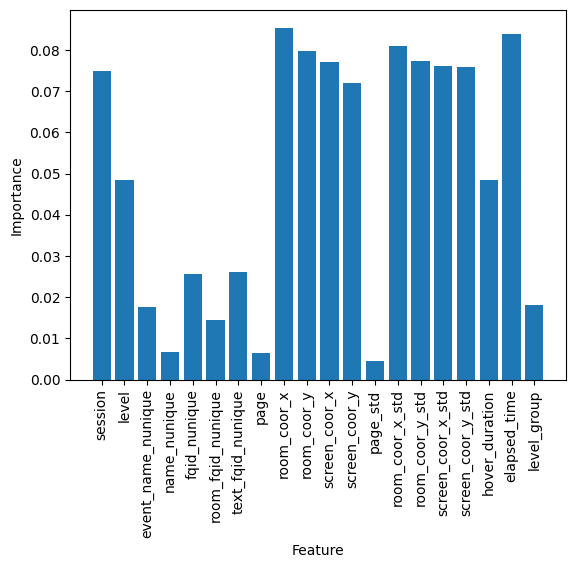

In [ ]:
importances1 = model.feature_importances_

plt.bar(range(X_train.shape[1]), importances1)
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

In [ ]:
from statistics import mean
from sklearn.ensemble import RandomForestRegressor
arg_values = range(1,19)

models  = {}
accs = []
for i in arg_values:
    # Train a random forest model
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train[X_train['level'] == i], y_train[X_train['level'] == i])
    models[i] = rf
    # Evaluate the model on the testing set
    y_pred = rf.predict(X_test[X_test['level'] == i])
    pred = models[i].predict(X_test[X_test['level'] == i])
    accs .append(accuracy_score(y_test[X_test['level'] == i], pred))
    accuracy1 = accs[-1]

    print('quesion %d accuracy: %f'%(i ,accuracy1))

print('mean', mean(accs))

quesion 1 accuracy: 0.720242
quesion 2 accuracy: 0.977660
quesion 3 accuracy: 0.939655
quesion 4 accuracy: 0.800752
quesion 5 accuracy: 0.567339
quesion 6 accuracy: 0.784326
quesion 7 accuracy: 0.721104
quesion 8 accuracy: 0.585677
quesion 9 accuracy: 0.740630
quesion 10 accuracy: 0.536238
quesion 11 accuracy: 0.635226
quesion 12 accuracy: 0.867755
quesion 13 accuracy: 0.720518
quesion 14 accuracy: 0.697568
quesion 15 accuracy: 0.565181
quesion 16 accuracy: 0.736391
quesion 17 accuracy: 0.682529
quesion 18 accuracy: 0.952432
mean 0.735067872761222
